# Jupyter Notebooks, numpy, and matplotlib

For the afternoon assignment we'll begin using jupyter notebooks. Notebooks are a great way to do exploratory data analysis and test things out. But they aren't really appropriate for developing code, so we haven't used them so far.

The first thing you'll see is that there are two types of cells. Some have a `In[ ]` before them; these are code cells, like below. If you click in a code cell, and hit `<return>` while holding down `<shift>` the code in the cell will be executed.

In [1]:
# this is a code cell with some code
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Others are filled with formatted text, these are markdown cells. If you double-click on those you can edit them; if you hit `<shift>-<return>` in those they will be formatted properly.

Markdown can contain various sorts of special formatting, such as
# Headers
## of various
### different sizes
#### from
##### big to
###### pretty small

And

* bulleted
* lists
* of items.

It can include *italics* and **boldface** and ***both*** and tables:

1 | 2 | 3
--|---|---
4 | 5 | 6
7 | 8 | 9

And equations in $\LaTeX$:

$$ \sum_{i=1}^n i = \frac{n(n+1)}{2}$$

And [links](https://daringfireball.net/projects/markdown/syntax) to other sites.

You can switch a cell between Markdown to Code with the dropdown menu above. 

We often use notebooks for DSI lecture notes. We can use it to display notes, run code, and show visualizations (we'll get to that later in the lecture).

Jupyter is based on ipython and the code cells work pretty much the same way. Each cell is evaluated and the result is displayed.

In [3]:
2 + 987987

987989

In [7]:
4 + 4


8

If the cell has multiple expresions only the last one is displayed.

In [5]:
1
1312312
1

1

It's ok to write and test out functions in notebooks, but try not to make a habit of it. Difficult code belongs in files where it can be accessed and tested by other functions.

## numpy

One of the main libraries used in data science is `numpy`. It's the core numerical processing library, used in nearly every numerically intensive area of python. Although python code itself might be slow, `numpy` internally calls functions written in `C` so it much faster.

It's generally imported using the `as` command.


In [8]:
import numpy as np

The basic object in `numpy` is an `array`, a matrix of objects of any dimension. We can create a 1-dimensional `array` from a `list`.

In [9]:
np.array([1,2,3])


array([1, 2, 3])

 Unlike a `list`, all elements of an `array` must be of the same type. If they aren't, they will all be converted to the same thing.

In [ ]:
np.array([1, 2.5, 3])

In [ ]:
np.array([1, '2', 3])

You can check the type of an array with the `dtype` attribute.

In [10]:
np.array([1, 2.0, 3]).dtype

dtype('float64')

Arrays have a `shape` attribute. Note that neither of these is a function; you'll get an error if you call them as such.

In [11]:
np.array([1,1,1]).shape

(3,)

The `shape` of an array is a tuple; for a 1-D array it just has a single element. Arrays can have multiple dimensions.

In [12]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
a.shape

(2, 3)

They can be added (element-wise). Suppose we want to add 10 to each element in `a`, we could do this.

In [14]:
a + np.array([[10, 10, 10], [10, 10, 10]])

array([[11, 12, 13],
       [14, 15, 16]])

In [17]:
a * 2


array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [18]:
a + 1

array([[2, 3, 4],
       [5, 6, 7]])

But that's a lot of work numpy supports a concept called broadcasting. If we combine two `array`s (or an `array` and a number or `list`) and the shapes don't match, numpy will *broadcast* the array over the missing dimensions. It's easy in the case of a single number. If we add a number to an `array`, it turns the broadcasts the number to an `array`  of the same shape and then adds them together.

In [15]:
a + [[10],[100]]

array([[ 11,  12,  13],
       [104, 105, 106]])

It's a bit more subtle when we combine two arrays. Consider

In [16]:
b = [10, 20, 30]
a + b

array([[11, 22, 33],
       [14, 25, 36]])

What's happening here?

Can we experiment to figure out broadcasting rules?

Other operations work the same way. Note that multiplication is element-wise; we'd need to use the `dot` method to do matrix multiplication.

We can change the shape of an `array` with the `reshape` method. Note that it returns a new array rather than changes the existing one.

In [ ]:
c = np.array(range(20))
c = c.reshape(4,5)
c

We can access elements of an array using square brackest, as in a list. We don't need multiple sets of brackets for multi-demensional arrays, though.

In [ ]:
c[1,4]

Note that it would be possible to add `array`s using indexes, and the `zeros` function to create an empty array, something like this.

In [ ]:
arr1 = np.array([2, 3, 5, 3, 6])
arr2 = np.array([7, 8, 1, 0, 6])

result = np.zeros(arr1.shape)
for i in range(arr1.shape[0]):
    result[i] += arr1[i] + arr2[i]
result

But not only is that a lot more work than `arr1 + arr2`, it's much, much slower.

Slicing also works.

In [ ]:
c[1:3, 2:]

In [ ]:
c[::-1, ::-1]

Finally, you can index an array with a boolean mask. Consider a larger random array (there are a lot of functions in numpy; don't worry about remembering them all, just that they exist).

In [ ]:
random_array = np.random.randint(0, 10, (5,10))
random_array

We want all the columns for which the value in the first row is greater than 6. To to that, we index the first row, compare it to 6 with a logical operator, and then use that as an index for the columns.

In [ ]:
random_array[:, random_array[0] > 6]

Indexing in numpy even more complicated than this since we can use one `array` to index another. We won't deal with that here.

## scipy

Another major library used in data science is `scipy`. I'm only introducing a bit of it, briefly, so we can play with random numbers. We generally import the stats module like this.

In [28]:
import scipy.stats as scs

In `scipy`, random distributions are objects, like so many other things in python (we'll learn how to define types of objects tomorrow. We can create a normal distribution with a mean of 3 and a standard deviation of 2 like this. 

In [29]:
dist1 = scs.norm(3, 2)

A poisson distribution with $\lambda$ = 2 looks like this.

In [24]:
dist2 = scs.poisson(2)

We can get random values from them with `rvs`.

In [25]:
dist1.rvs(10)

array([ 0.56881476,  1.97846062,  2.21571655,  1.23262207,  5.03198497,
       -0.23599479,  5.38301303,  2.88062376,  2.7072808 ,  2.31892206])

In [26]:
dist2.rvs(10)

array([1, 1, 1, 2, 2, 0, 1, 1, 0, 3])

We can do other things with them too, like get the pdf/pmf and cdf, but we won't do that today.

## matplotlib

Another key library in data science is `matplotlib`, used to generate plots. We'll generally import it the same way and mostly use it from notebooks, though we can use it from a program as well. When running from a notebook it's best to include the ipython command `%matplotlib inline` so the plot shows up in the notebook rather than a separate window.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

There are a number of different ways you can create a plot. We'll try to avoid the shortcuts since they use different methods and are likely to confuse you. So you should (almost) always start a new plot with something like this.

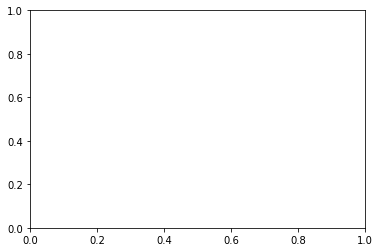

In [20]:
fig, ax = plt.subplots()

That just made an empty plot. `plt.subplots()` returns a tuple with two values. The first is the figure, the entire object being displayed. The second is the axis which is just an individual plot. If we pass arguments it the second argument is an `array` of axis objects.

(2, 3)

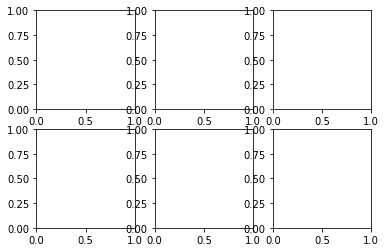

In [21]:
fig, axes = plt.subplots(2, 3)
axes.shape

To plot something we need data. We'll use some methods from numpy.

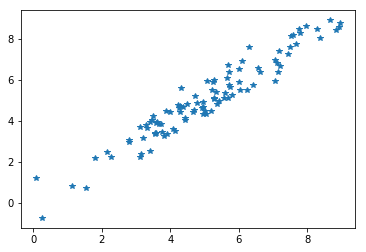

In [40]:
x = scs.norm(5, 2).rvs(100)
y = x + scs.norm(0,0.5).rvs(100)
fig, ax = plt.subplots()
ax.plot(x, y, '*')

What went wrong there?

The first two arguments should be `array`s (or lists, or something equivalent). They should have the same length. The third argument is the marker type and color.

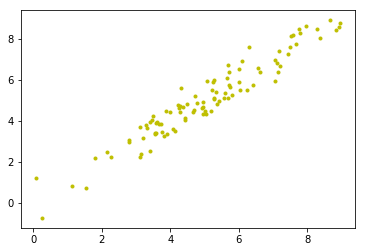

In [45]:
fig, ax = plt.subplots()
ax.plot(x, y, 'y.')

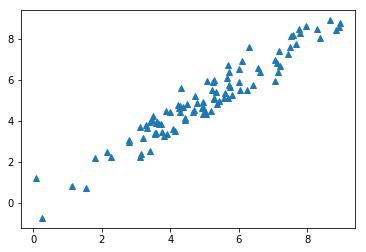

In [53]:
fig, ax = plt.subplots()
ax.plot(x, y, '^')

We can put multiple plots on the same axis.

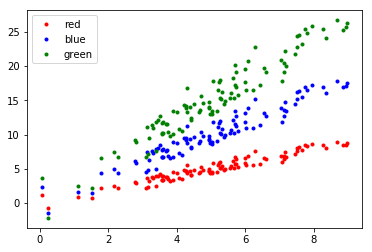

In [48]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r.', label='red')
ax.plot(x, y*2, 'b.', label='blue')
ax.plot(x, y*3, 'g.', label='green')
ax.legend()

We can also plot histograms.

(array([  3.,   1.,   2.,   7.,   9.,  16.,  14.,  17.,  21.,  43.,  61.,
         81., 108., 149., 177., 227., 238., 311., 338., 399., 451., 495.,
        540., 530., 624., 557., 624., 561., 504., 487., 406., 396., 335.,
        264., 234., 179., 163., 107.,  95.,  66.,  46.,  40.,  20.,  16.,
         17.,   7.,   8.,   3.,   1.,   2.]),
 array([-3.57381098, -3.43183886, -3.28986674, -3.14789462, -3.0059225 ,
        -2.86395037, -2.72197825, -2.58000613, -2.43803401, -2.29606189,
        -2.15408977, -2.01211765, -1.87014553, -1.7281734 , -1.58620128,
        -1.44422916, -1.30225704, -1.16028492, -1.0183128 , -0.87634068,
        -0.73436856, -0.59239644, -0.45042431, -0.30845219, -0.16648007,
        -0.02450795,  0.11746417,  0.25943629,  0.40140841,  0.54338053,
         0.68535266,  0.82732478,  0.9692969 ,  1.11126902,  1.25324114,
         1.39521326,  1.53718538,  1.6791575 ,  1.82112963,  1.96310175,
         2.10507387,  2.24704599,  2.38901811,  2.53099023,  2.67296235,
 

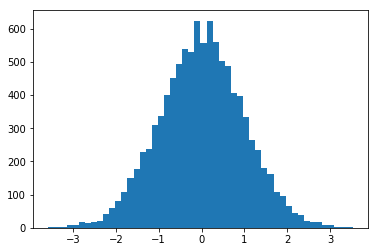

In [59]:
fig, ax = plt.subplots()
pts = scs.norm(0, 1).rvs(10000)
ax.hist(pts, bins=50)
#None here would skip printing arrays